# question1

In [3]:
test_data = read.csv('./assignment1_datasets/Task1A_test.csv', header=F)
train_data = read.csv('./assignment1_datasets/Task1A_train.csv', header=F)

In [4]:
dim(test_data)

[1] 43  2

In [5]:
train.index = 2:dim(train_data)[1]
train.index = 2:dim(test_data)[1]
train.data <- train_data[train.index, 1]
train.label <- train_data[train.index, 2]
test.data <- test_data[train.index, 1]
test.label <- test_data[train.index, 2]
length(test.data)

[1] 42

In [8]:
majority <- function(x) {
   uniqx <- as.numeric(x)
   return (round(mean(uniqx), 4))
}

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'manhattan')
{
    if(is.null(dim(train.data)) == TRUE )
    {
        train.len <- length(train.data)
        test.len <- length(test.data)
        merge_data <- c(test.data, train.data)
    }
    else
    {
        train.len <- nrow(train.data)
        test.len <- nrow(test.data)
        merge_data <- rbind(test.data, train.data)
    }
    test_.label = c()
#     print(as.matrix(dist(c(test.data, train.data), method= distance)))
    dist <- as.matrix(dist(merge_data, method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    for (i in 1:test.len)
    {
        if(test.len == 1)
        {
            nn <- as.data.frame(sort(dist, index.return = TRUE))[1:K,2]
            test_.label = c(test_.label, majority(train.label[nn]))
        }
        else
        {
            nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
            test_.label = c(test_.label, majority(train.label[nn]))
        }
        
    }
    return (test_.label)
}


In [9]:
x <- knn(train.data, train.label, train.data, 14)

In [10]:
loss <- function(test.label, test.output)
{
    test.label <- as.numeric(test.label)
    test.output <- as.numeric(test.output)
    error = 0
    for (i in 1:length(test.label))
        error = error + (test.label[i] - test.output[i]) * (test.label[i] - test.output[i])
#         error = error + abs(test.label[i] - test.output[i])
    return(error / length(test.label))
}

In [55]:
loss_k <- function(K, data, label)
{
    return(loss(label, knn(train.data, train.label, data, K)))
}

png 
  2

[1] 1.6897238 2.1266708 1.6951289 1.8528619 1.3802052 1.4729567 1.0792702
 [8] 1.1767419 0.9545814 1.0460454 0.9076510 1.1091626 1.0492686 1.2789921
[15] 1.2480227 1.5355340 1.5651127 1.8456774 1.9171766 2.2769648 2.4038402
[22] 2.7883150 2.9822831 3.4387119 3.6958971 4.1964596 4.5136905 5.0731148
[29] 5.4174987 6.0054663 6.4160673 7.0589144 7.5277480 8.1960868 8.7808739

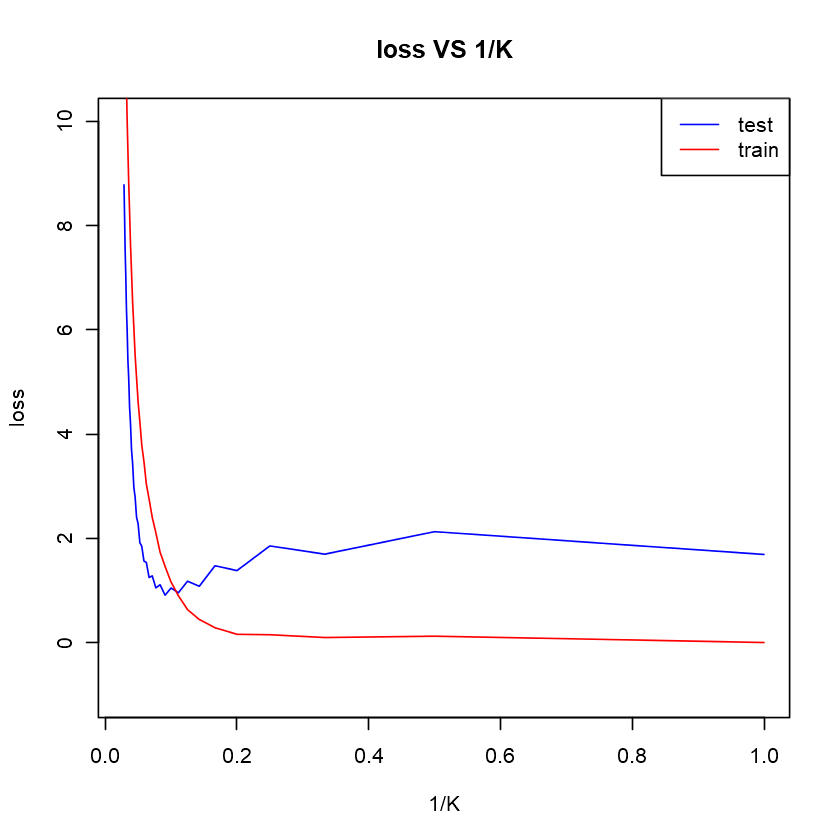

In [57]:
x = seq(1,35)
y1 = rep(0,length(x))
for(i in x)
{
    y1[i] = loss_k(i, test.data, test.label)
}
y2 = rep(0,length(x))
for(i in x)
{
    y2[i] = loss_k(i, train.data, train.label)
}
x1 = rep(0,length(x))
for(i in x)
{
    x1[i] = 1/i
}
plot(x1, y1, type='l', xlab = '1/K', ylim = c(-1, 10), ylab = 'loss', main = 'loss VS 1/K', col = 'blue')
lines(x1, y2, col = 'red')
legend('topright',c("test","train"),col=c('blue','red'),lty=c(1,1))
png(filename='loss_of_different_K.png')
plot(x1, y1, type='l', xlab = '1/K', ylim = c(-1, 10), ylab = 'loss', main = 'loss VS 1/K', col = 'blue')
lines(x1, y2, col = 'red')
legend('topright',c("test","train"),col=c('blue','red'),lty=c(1,1))
dev.off()
y1

# question 2

In [11]:
cv <- function(train.data, train.label, K)
{
    error = c()
    for(i in 1:length(train.data))
    {
        train_.data = train.data[-i]
        train_.label = train.label[-i]
        f_error = loss(train.label[i], knn(train_.data, train_.label, train.data[i], K))
        f_error = round(f_error, 4)
        error = c(error, f_error)
    }
    return (error)
    
}

In [12]:
length(cv(train.data, train.label, 12))

[1] 42

In [13]:
aver_loss_k <-function(train.data, train.label, K)
{
    return (sum(cv(train.data, train.label, K))/length(train.data))
}

In [14]:
aver_loss_k(train.data, train.label, 12)

[1] 2.470698

 [1] 0.4891690 0.2167548 0.2663833 0.2472167 0.4078333 0.6011381 0.8245738
 [8] 1.1362286 1.4317024 1.7678048 2.0645024 2.4706976 2.7869810 3.1594071
[15] 3.4573333 3.9230714 4.2449548 4.7215190 5.1110333 5.6046524


png 
  2

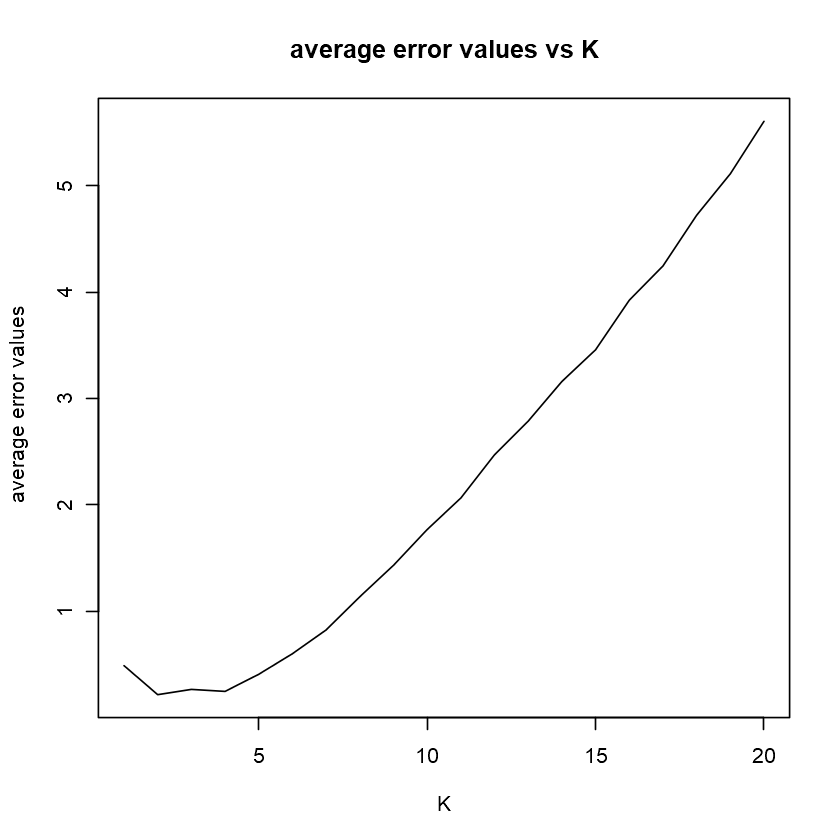

In [15]:
x = seq(1,20)
y = rep(0,length(x))
for(i in x)
{
    y[i] = aver_loss_k(train.data, train.label, i)
}
print(y)
plot(x, y, type='l', xlab = 'K', ylab = ' average error values', main = 'average error values vs K')
png(filename=' average error values vs K.png')
plot(x, y, type='l', xlab = 'K', ylab = ' average error values', main = 'average error values vs K')
dev.off()

# question 3

In [42]:
library(ggplot2)
library(reshape2)
test_data = read.csv('./assignment1_datasets/Task1B_test.csv', header=F)
train_data = read.csv('./assignment1_datasets/Task1B_train.csv', header=F)
train.index = 2:dim(train_data)[1]
train.index = 2:dim(test_data)[1]
train.data <- train_data[train.index, 1:4] 
train.label <- train_data[train.index, 5]
test.data <- test_data[train.index, 1:4]
test.label <- test_data[train.index, 5]

In [97]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

# fix the parameters (50,40,50)
K <- 20           # Maximum K for KNN 
L <- 30           # number of datasets
N <- 60          # size of datasets
# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

In [98]:
# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K)
{
    ### for every dataset sizes:
    for (l in 1:L)
    {
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        #### calculate and record the train and test missclassification rate        
        miss[i,'test'] <-  loss(test.label, knn(train.data[indx, ], train.label[indx], test.data, k))
    }    
}

In [99]:
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')

png 
  2

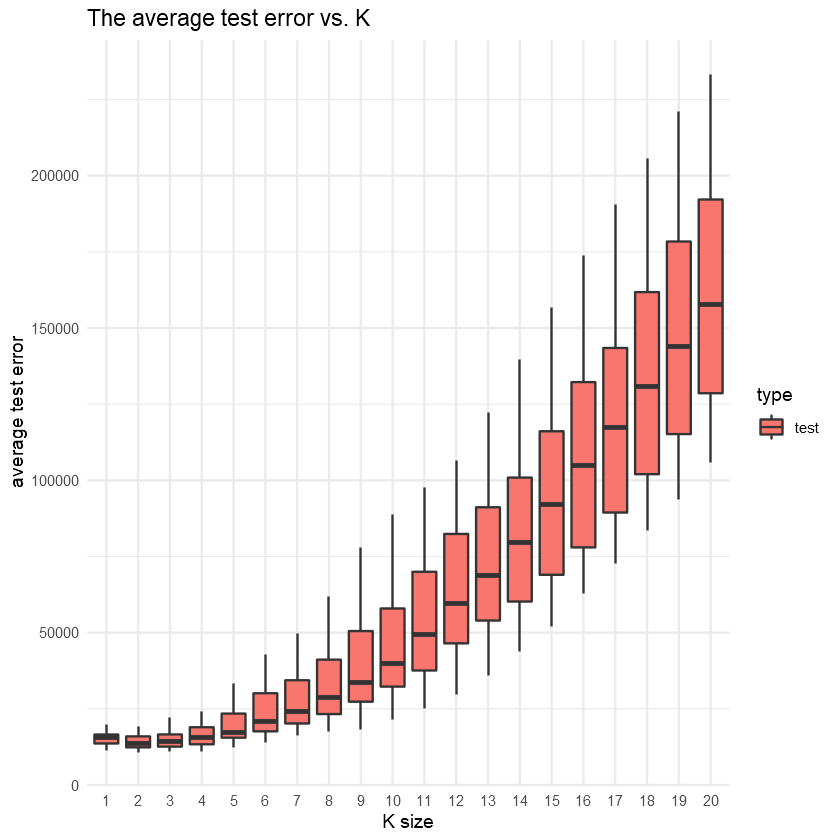

In [100]:
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('The average test error vs. K') + theme_minimal() + xlab('K size') + ylab('average test error')
png(filename='The average test error vs. K.png')
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('The average test error vs. K') + theme_minimal() + xlab('K size') + ylab('average test error')
dev.off()

In [101]:
for(k in 1:K)
{
    print(summary(subset(miss.m, K == k)['miss']))
}

      miss      
 Min.   :11353  
 1st Qu.:13635  
 Median :15449  
 Mean   :16353  
 3rd Qu.:16569  
 Max.   :43392  
      miss      
 Min.   :10676  
 1st Qu.:12358  
 Median :13597  
 Mean   :15402  
 3rd Qu.:15958  
 Max.   :35990  
      miss      
 Min.   :10890  
 1st Qu.:12594  
 Median :14332  
 Mean   :16711  
 3rd Qu.:16590  
 Max.   :44378  
      miss      
 Min.   :11166  
 1st Qu.:13359  
 Median :15491  
 Mean   :18576  
 3rd Qu.:18960  
 Max.   :45164  
      miss      
 Min.   :12375  
 1st Qu.:15521  
 Median :17371  
 Mean   :21949  
 3rd Qu.:23435  
 Max.   :54099  
      miss      
 Min.   :14063  
 1st Qu.:17612  
 Median :20736  
 Mean   :25711  
 3rd Qu.:30116  
 Max.   :61204  
      miss      
 Min.   :16201  
 1st Qu.:20197  
 Median :24104  
 Mean   :29600  
 3rd Qu.:34383  
 Max.   :66948  
      miss      
 Min.   :17452  
 1st Qu.:23281  
 Median :28872  
 Mean   :34779  
 3rd Qu.:41149  
 Max.   :71166  
      miss      
 Min.   :18381  
 1st Qu.:27345

In the picture above, the optimum value of K is 2. When K is small than 2, the average test error and the uncertainty is decrease if K becomes larger. When K is larger than 2, the average test error and the uncertainty is increase if K becomes larger.

In [102]:
# a dataframe to track the number of missclassified samples in each case
K <- 5           # Maximum K for KNN 
L <- 30           # number of datasets
N <- 75          # size of datasets

miss <- data.frame('N'=seq(5,N,5),'L'=1:L, 'test'=rep(0,L*N/5))

for(n in seq(5,N,5))
{
    boot.indx <- boot(nrow(train.data), n, L)
    for (l in 1:L)
    {
        #### calculate iteration index i
        i <- (n/5-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'N'] <- n
        miss[i,'L'] <- l
        #### calculate and record the train and test missclassification rate    
        miss[i,'test'] <-  loss(test.label, knn(train.data[indx, ], train.label[indx], test.data, K))
    }
}

In [103]:
miss.m <- melt(miss, id=c('N', 'L')) # reshape for visualization
names(miss.m) <- c('N', 'L', 'type', 'miss')

png 
  2

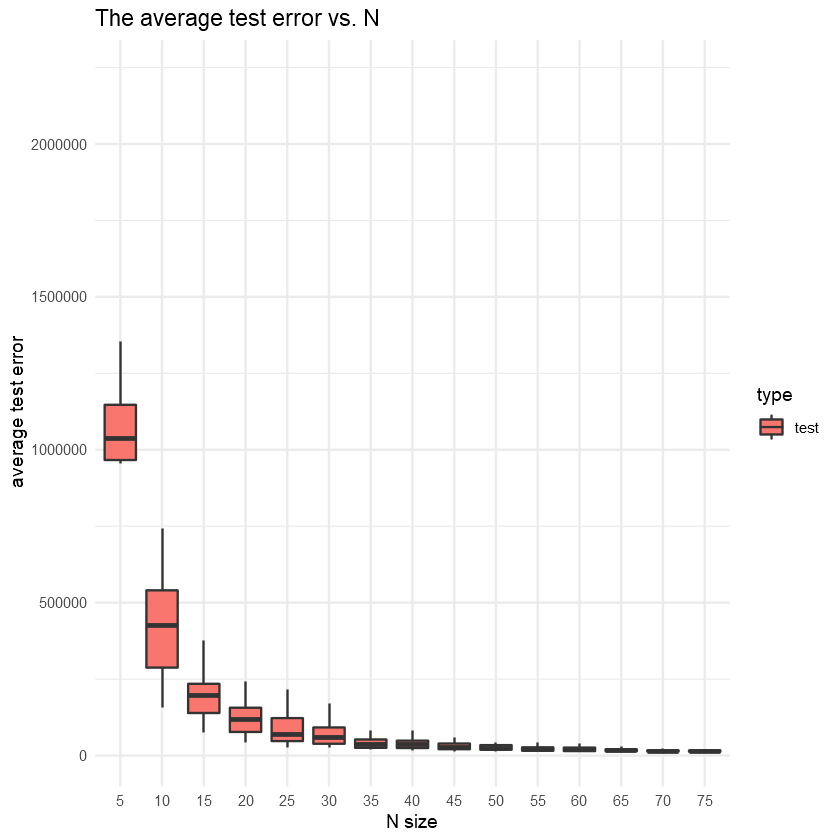

In [104]:
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(N), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('The average test error vs. N') + theme_minimal() + xlab('N size') + ylab('average test error')
png(filename='The average test error vs. K.png')
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(N), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('The average test error vs. N') + theme_minimal() + xlab('N size') + ylab('average test error')
dev.off()

In the picture above, with the increase of N the average test error and uncertainty decrease because larger subset size could make the prediction more accurate.

# question 5

In [47]:
library(ggplot2) # for plotting functions.
library(reshape2) # for melt and cast functions

Warning message:
"程辑包'ggplot2'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'reshape2'是用R版本4.1.3 来建造的"


In [3]:
test_data = read.csv('./assignment1_datasets/Task1C_test.csv', header=F)
train_data = read.csv('./assignment1_datasets/Task1C_train.csv', header=F)
train.index = 2:dim(train_data)[1]
train.index = 2:dim(test_data)[1]
train.data <- train_data[train.index, 1:4] 
train.label <- train_data[train.index, 5]
test.data <- test_data[train.index, 1:4]
test.label <- test_data[train.index, 5]

train.data <- as.data.frame(lapply(train.data,as.numeric))
train.label <- as.numeric(train.label)
test.data <- as.data.frame(lapply(test.data,as.numeric))
test.label <- as.numeric(test.label)


In [4]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w)
{
    return(Phi%*%w)
} 

# auxiliary function to calculate a cost function
error_func <- function (Phi, w, label, lambda)
{
    return(sum((predict_func(Phi, w) - label)^2)/2 + lambda * t(w)%*%w / 2)
#     return(sum((predict_func(Phi, w) - label)^2)/2)
}

In [5]:
norm <- function(train.data, train.label,test.data, test.label)
{
    normtrain.data = as.matrix(cbind(train.data, train.label))
    normtest.data = as.matrix(cbind(test.data, test.label))
    for(i in 2:dim(normtrain.data)[2])
    {
        min_ = min(as.numeric(normtrain.data[,i]))
        max_ = max(as.numeric(normtrain.data[,i]))
        for(j in 1:dim(normtrain.data)[1])
        {
            normtrain.data[j,i] = (as.numeric(normtrain.data[j,i])-min_)/(max_ - min_)
        }
         for(j in 1:dim(normtest.data)[1])
        {
            normtest.data[j,i] = (as.numeric(normtest.data[j,i])-min_)/(max_ - min_)
        }
    }
#     print(cbind(normtrain.data,normtest.data))
    return (cbind(normtrain.data,normtest.data))
}

In [6]:
sgd_train <- function(train.data, train.label, test.data, test.label, lambda)
{
#     set.seed(123)
    train.len = nrow(train.data)
    # project data using a basis function (identical here)
    Phi <- as.matrix(cbind('X0'=1, train.data)) # add a column of 1 as phi_0
    T <- as.numeric(train.label)# rename just for conviniance
        test_Phi <- as.matrix(cbind(1, test.data)) # add a column of 1 as phi_0
    test_T <- as.numeric(test.label)
    norm_data = norm(Phi,T,test_Phi,test_T)
    Phi = norm_data[,1:5]
    T = norm_data[,6]
    test_Phi = norm_data[,7:11]
    test_T = norm_data[,12]

    
    tau.max <- 20 * train.len# maximum number of iterations
    eta <- 0.0001 # learning rate
    epsilon <- 0.1 * mean(T) # a threshold on the cost (to terminate the process)
    W <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # be used to store the estimated oefficients
    W[1,] <- runif(ncol(Phi)) # initial weight (any better idea?)
    W[1,] 
    error <- data.frame('tau'=1:tau.max)  # to be used to trace the test and training errors in each iteration
    tau <- 1 # iteration counter
    terminate <- FALSE

    while(!terminate)
    {
        # check termination criteria:
        if (terminate <- tau >= tau.max | error_func(Phi, W[tau,], T, lambda) <= epsilon) {terminate<-TRUE;break}

        # shuffle data:
        train.index <- sample(1:train.len, train.len, replace = FALSE)
        Phi <- Phi[train.index,]
        T <- T[train.index]
    #     print(predict_func(Phi, W[tau,]))
        # for each datapoint:
        for (i in 1:train.len){
            # check termination criteria:
    #         print(predict_func(Phi,  W[tau,])[1])
    #         print(T[1])
            if (tau >= tau.max | error_func(Phi, W[tau,], T, lambda)<= epsilon) {terminate<-TRUE;break}
            t_pred = predict_func(Phi[i,], W[tau,])
            # for each coefficient:
            for (j in 1: ncol(W)){
                # update the coefficient:
    #             print(eta * (T[i]-t_pred) * Phi[i,j])
    #             print(W[(tau),j])
                grad <- (T[i]-t_pred) * Phi[i,j] - lambda * W[tau,j]
                if(grad > 100)
                {
                      W[(tau+1),j] <- W[tau,j] + eta * 100
                }
                else
                    if(grad < -100)
                    {
                        W[(tau+1),j] <- W[tau,j] - eta * 100
                    }
                    else
                    {
                        W[(tau+1),j] <- W[tau,j] + eta * grad
                    }
            }

            # record the error:
            error[tau, 'train'] <- error_func(as.matrix(Phi), W[tau,],T, lambda)
            error[tau, 'test'] <- error_func(as.matrix(test_Phi), W[tau,],test_T, lambda)

            # update the counter:
            tau <- tau + 1        
        }

    }
    return(error)

    
}

In [7]:
sgd_train(train.data, train.label, test.data, test.label, 1)

tau,train,test
<int>,"<dbl[,1]>","<dbl[,1]>"
1,104.1267,104.5752
2,104.0482,104.4964
3,103.9336,104.3814
4,103.8491,104.2965
5,103.7921,104.2393
6,103.7315,104.1785
7,103.6706,104.1174
8,103.6110,104.0577
9,103.5522,103.9987


In [8]:
lams <- seq(0, 10, 0.5)
error_rate_train <- c()
error_rate_test <- c()
for(lam in lams)
{
    error <- sgd_train(train.data, train.label, test.data, test.label, lam)
    error_rate_train <- c(error_rate_train, min(error['train'][1:nrow(train.data)*20-1,]))
    error_rate_test <- c(error_rate_test, min(error['test'][1:nrow(train.data)*20-1,]))
}
error_rate_train
error_rate_test

[1]  7.0135103  0.6789596  7.3907109  7.8640676  8.3942562  7.8576929
 [7]  4.1345036  8.1682202  8.6050977 10.3158927  2.9243912  8.9681419
[13] 16.0068770  1.6112620  4.3284061  1.6460803 11.5751953  7.7254697
[19]  7.6650996  2.3654339  5.4675429

[1]  7.0147726  0.6935506  7.4067616  7.8705509  8.4150141  7.8544354
 [7]  4.1366884  8.1749191  8.6229503 10.3235234  2.9261157  8.9705822
[13] 16.0622478  1.6245391  4.3277847  1.6572174 11.5887106  7.7306673
[19]  7.6793738  2.3688215  5.4694663

png 
  2

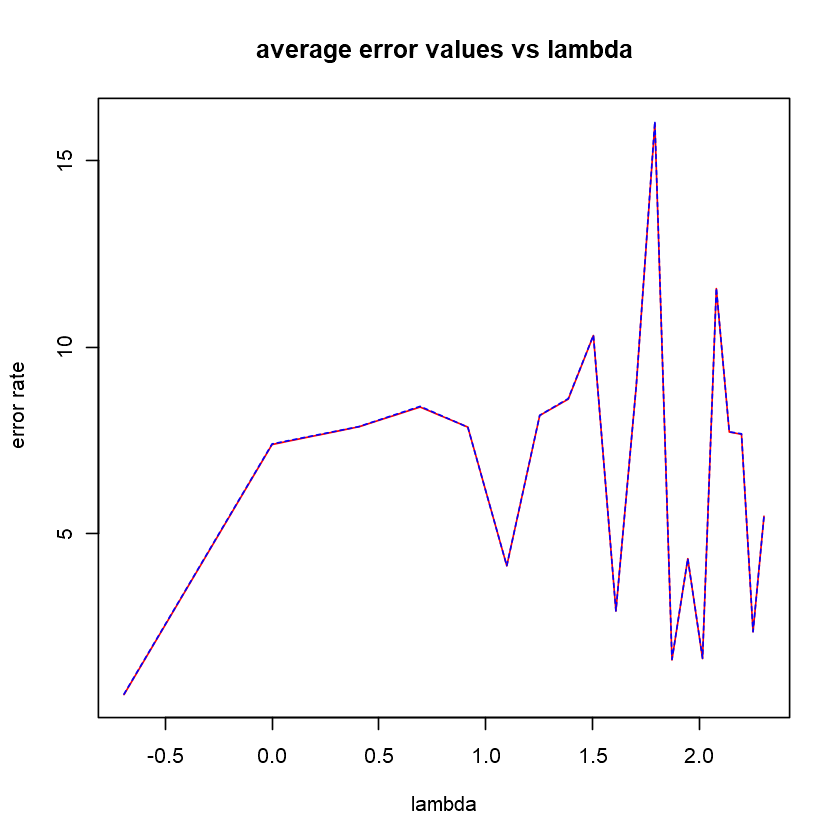

In [9]:
min_ = min(error_rate_train, error_rate_test)
max_ = max(error_rate_train, error_rate_test)
log_lams = c()
for(lam in lams)
{
    log_lams = c(log_lams, log(lam))
}
plot(log_lams, error_rate_train, col="red", type='l', xlab = 'lambda',ylim = c( min_, max_),  ylab = ' error rate', main = 'average error values vs lambda')
lines(log_lams, error_rate_test, col="blue", lty=2)
png(filename=' average error values vs lambda for SGD.png')
plot(log_lams, error_rate_train, col="red", type='l', xlab = 'lambda',ylim = c( min_, max_),  ylab = ' error rete', main = 'average error values vs lambda')
lines(log_lams, error_rate_test, col="blue", lty=2)
dev.off()

The best value for lambda is 3, when lambda is too small or too large, the error rate is large. Lambda increases, model becomes less complex, training error.

# question 6

In [170]:
test_data = read.csv('./assignment1_datasets/Task1D_test.csv', header=F)
train_data = read.csv('./assignment1_datasets/Task1D_train.csv', header=F)
train.index = 2:dim(train_data)[1]
train.index = 2:dim(test_data)[1]
train.data <- train_data[train.index, 1:4] 
train.label <- train_data[train.index, 5]
test.data <- test_data[train.index, 1:4]
test.label <- test_data[train.index, 5]

name_ = c()
for(n in train.label)
{
    if(n%in%name_ == FALSE)
    {
        name_ = c(name_, n)
    }
}

index <- data.frame('x1' = name_, 'x2' = seq(1, length(name_)))
for(i in 1:length(train.label))
{
    train.label[i] = index[which(index['x1'] == train.label[i]), 2]
}
for(i in 1:length(test.label))
{
    test.label[i] = index[which(index['x1'] == test.label[i]), 2]
}

In [171]:
matrixmul <- function(matrix1, matrix2)
{
    res = c()
    if(is.null(dim(matrix1)))
    {
        sum_ = 0
        for(j in 1:length(matrix1))
        {
            sum_ = sum_ + as.numeric(matrix1[j]) * as.numeric(matrix2[j])
        }
        res = c(res, sum_)
    }
    else
    {
        for(i in 1:dim(matrix1)[1])
        {
            sum_ = 0
            for(j in 1:dim(matrix1)[2])
            {
                sum_ = sum_ + as.numeric(matrix1[i,j]) * as.numeric(matrix2[j])
            }
            res = c(res, sum_)
        }
    }
    return(res)   
}
label_pred <- function(Phi, W, tau, T)
{
    out = as.matrix(cbind(matrixmul(Phi, W[tau,1,]), matrixmul(Phi, W[tau,2,]), matrixmul(Phi, W[tau,3,])))
    pred = c()
    for(i in 1:dim(out)[1])
    {
        temp = max(out[i, ])
        for(j in 1:dim(out)[2])
        {
            if(out[i,j] == temp)
            {
                pred = c(pred,j)
                break
            }
        } 
        
    }
    return (pred)
}
label_pred_test <- function(Phi, W, tau, T)
{
    print(cbind(W[tau,1,],W[tau,2,],W[tau,3,]))
    out = as.matrix(cbind(matrixmul(Phi, W[tau,1,]), matrixmul(Phi, W[tau,2,]), matrixmul(Phi, W[tau,3,])))
    pred = c()
    for(i in 1:dim(out)[1])
    {
        temp = max(out[i, ])
        for(j in 1:dim(out)[2])
        {
            if(out[i,j] == temp)
            {
                pred = c(pred,j)
                break
            }
        } 
        
    }
    print(cbind(out, pred, T))
    return (pred)
}

In [172]:
norm <- function(train.data, test.data)
{
    normtrain.data = as.matrix(train.data)
    normtest.data = as.matrix(test.data)
    for(i in 2:dim(normtrain.data)[2])
    {
        min_ = min(as.numeric(normtrain.data[,i]))
        max_ = max(as.numeric(normtrain.data[,i]))
        for(j in 1:dim(normtrain.data)[1])
        {
            normtrain.data[j,i] = (as.numeric(normtrain.data[j,i])-min_)/(max_ - min_)
        }
        for(j in 1:dim(normtest.data)[1])
        {
            normtest.data[j,i] = (as.numeric(normtest.data[j,i])-min_)/(max_ - min_)
        }
    }
    return(cbind(normtrain.data, normtest.data))
}


In [173]:
mul_class <- function(train.date, train.label, eta, test.date, test.label, mini_batch)
{
    epsilon <- 0.001 # Stoping criterion
    tau.max <- 500  # Maximum number of iterations
    Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0
    T <- as.numeric(train.label)
    test_Phi <- as.matrix(cbind(1, test.data)) # add a column of 1 as phi_0
    test_T <- as.numeric(test.label)  
    norm_data = norm(Phi,test_Phi)
    Phi = norm_data[,1:5]
    test_Phi = norm_data[,6:10]
    W <- array(,dim = c(tau.max, length(name_), ncol(Phi))) # Empty Weight vector
    for(n in 1:length(name_))
    {
#         set.seed(1)
        W[1,n,] <-  runif(ncol(Phi))# Random initial values for weight vector
    }
    error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
    error.trace[1] <- sum(label_pred(Phi, W, 1, T) != T)/dim(Phi)[1] * 100 # record error for initial weights
    errors = c()
    tau <- 2 # iteration counter 
    terminate <- FALSE # termination status
    while(!terminate)
    {
        if (terminate <- tau > tau.max | sum(label_pred(Phi, W, tau-1,T) != T)/dim(Phi)[1] < epsilon){break}
        # resuffling train data and associated labels:
        train.index <- sample(1:dim(Phi)[1], replace = FALSE)
#         train.index <- seq(1:dim(Phi)[1])
        Phi <- Phi[train.index,]
        T <- T[train.index]
        
#         print("###########################")
        for (i in 1:dim(Phi)[1])
        { 
            pred = label_pred(Phi[i,], W, tau-1, T[i])
            if(pred != T[i])
            {
                for(j in 1:dim(W)[2])
                {
                    W[tau,j,] <- W[tau-1, j, ] 
                }
                W[tau,pred,] <- W[tau-1, pred, ] - eta * as.numeric(Phi[i,])
                W[tau,T[i],] <- W[tau-1, T[i], ] + eta * as.numeric(Phi[i,])   
                error.trace[tau] <- sum(label_pred(Phi, W, tau,T) != T)/dim(Phi)[1] * 100
                eta = eta * 0.99
                if(tau %% mini_batch == 0)
                {
                    print(tau)
#                     for(j in 1:dim(W)[2])
#                     {
#                         print(W[tau,j,])
#                     }
#                     print("******************")
                    x <- sum(label_pred_test(test_Phi, W, tau, test_T) != test_T)/dim(test_Phi)[1] * 100
                    errors = c(errors, x)
                }
                if (terminate <- tau >= tau.max | sum(label_pred(Phi, W, tau,T) != T)/dim(Phi)[1] < epsilon){break}    
                tau <- tau + 1 
            }           
        }      
    }
    return(errors)
}


In [176]:
e1 <- mul_class(train.date, train.label, 0.1, test.date, test.label, 5)

[1] 5
          [,1]      [,2]      [,3]
[1,] 0.4660724 0.5455982 0.6995035
[2,] 0.3686834 0.8008128 0.8949923
[3,] 0.9427967 0.8208608 0.7695617
[4,] 0.6260445 0.3987154 0.1231281
[5,] 0.4850081 0.1230950 0.4775979
                                    pred T
 [1,] 1.0335367 1.0899800 1.2298140    3 1
 [2,] 1.0555261 1.0630254 1.1871837    3 1
 [3,] 1.5657037 1.5936444 1.7412916    3 1
 [4,] 1.2349002 1.2773594 1.4056050    3 1
 [5,] 1.0688341 1.1306976 1.2486468    3 1
 [6,] 1.2231667 1.2355832 1.3534500    3 1
 [7,] 0.9144619 0.9189751 1.0409274    3 1
 [8,] 1.8024740 1.8483728 2.0017097    3 1
 [9,] 1.3005653 1.3390861 1.4871848    3 1
[10,] 1.4458614 1.4631099 1.5992091    3 1
[11,] 1.4211750 1.4291502 1.5824632    3 1
[12,] 1.2830252 1.2914405 1.4599538    3 1
[13,] 1.0659308 1.1277629 1.2611088    3 1
[14,] 1.3021398 1.3649821 1.4964928    3 1
[15,] 1.1222043 1.1331389 1.2530374    3 1
[16,] 1.3200065 1.3846855 1.5538888    3 1
[17,] 1.6393111 1.7046457 1.8322894    3 1
[18,] 1.11

In [177]:
e2 <- mul_class(train.date, train.label, 0.01, test.date, test.label, 5)

[1] 5
           [,1]      [,2]       [,3]
[1,] 0.06376256 0.7099847 0.04303782
[2,] 0.35658466 0.4054798 0.20745637
[3,] 0.27921206 0.7168624 0.97273781
[4,] 0.33579563 0.8284471 0.72868977
[5,] 0.56216631 0.9496628 0.99807246
                                    pred T
 [1,] 0.2969381 1.2085193 0.6286681    2 1
 [2,] 0.2835085 1.2198353 0.6684800    2 1
 [3,] 0.5345499 1.6984454 1.1972133    2 1
 [4,] 0.3666184 1.3713933 0.8325888    2 1
 [5,] 0.2925017 1.2171278 0.6457533    2 1
 [6,] 0.3506986 1.3608602 0.8323663    2 1
 [7,] 0.1916065 1.0531020 0.5123104    2 1
 [8,] 0.6220628 1.8779058 1.4229758    2 1
 [9,] 0.4084519 1.4433447 0.9144318    2 1
[10,] 0.4540308 1.5597951 1.0657451    2 1
[11,] 0.4641586 1.5652280 1.0610106    2 1
[12,] 0.4457818 1.4963351 0.9420149    2 1
[13,] 0.3191266 1.2488895 0.6596560    2 1
[14,] 0.4015254 1.4301041 0.8914827    2 1
[15,] 0.3133014 1.2803004 0.7334381    2 1
[16,] 0.4566879 1.4996809 0.9409077    2 1
[17,] 0.5213214 1.6918786 1.2222376    2 

png 
  2

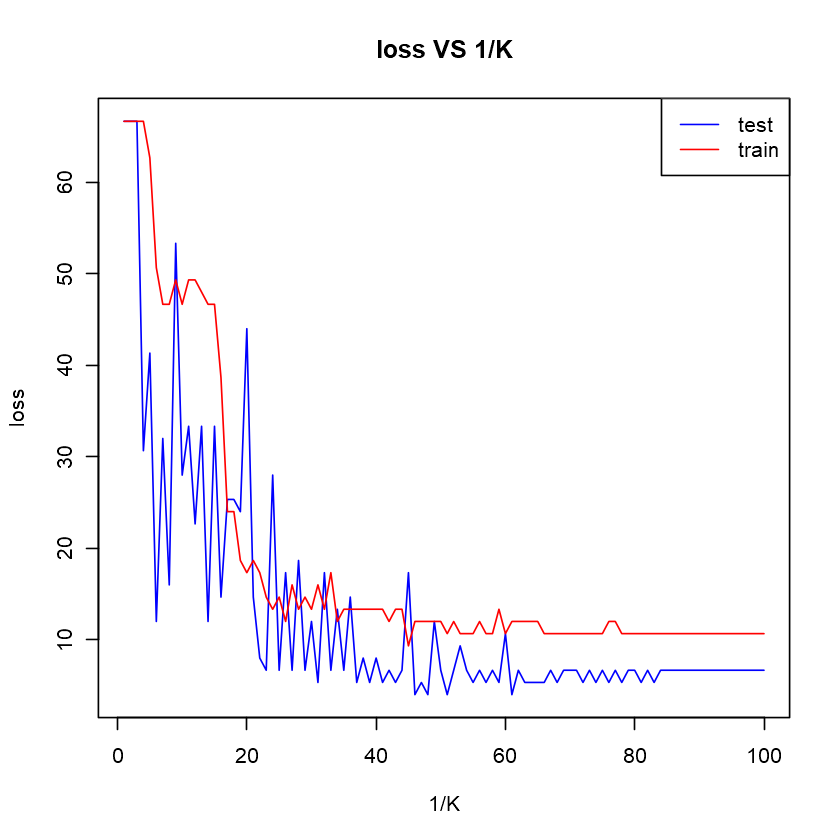

In [178]:
min_ = min(c(e1,e2))
max_ = max(c(e1,e2))

plot(1:100, e1, type='l', xlab = '1/K', ylim = c(min_, max_), ylab = 'loss', main = 'loss VS 1/K', col = 'blue')
lines(1:100, e2, col = 'red')
legend('topright',c("test","train"),col=c('blue','red'),lty=c(1,1))
png(filename='loss_of_different_K.png')
plot(1:100, e1, type='l', xlab = '1/K', ylim = c(min_, max_), ylab = 'loss', main = 'loss VS 1/K', col = 'blue')
lines(1:100, e2, col = 'red')
legend('topright',c("test","train"),col=c('blue','red'),lty=c(1,1))
dev.off()